In [1]:
import xarray as xr
import numpy as np

In [ ]:
datapath='/PATH/TO/DATA/'
savepath='/PATH/TO/OUTPUT/'

In [2]:
#load data
c50r1=xr.open_dataset(datapath+'eke_mean_reg_r1_1951-1955.nc').mean(dim='time')
c15r1=xr.open_dataset(datapath+'eke_mean_reg_r1_2016-2020.nc').mean(dim='time')
c90r1=xr.open_dataset(datapath+'eke_mean_reg_r1_2091-2095.nc').mean(dim='time')

c50r2=xr.open_dataset(datapath+'eke_mean_reg_r2_1951-1955.nc').mean(dim='time')
c15r2=xr.open_dataset(datapath+'eke_mean_reg_r2_2016-2020.nc').mean(dim='time')
c90r2=xr.open_dataset(datapath+'eke_mean_reg_r2_2091-2095.nc').mean(dim='time')

c50r3=xr.open_dataset(datapath+'eke_mean_reg_r3_1951-1955.nc').mean(dim='time')
c15r3=xr.open_dataset(datapath+'eke_mean_reg_r3_2016-2020.nc').mean(dim='time')
c90r3=xr.open_dataset(datapath+'eke_mean_reg_r3_2091-2095.nc').mean(dim='time')

c50r4=xr.open_dataset(datapath+'eke_mean_reg_r4_1951-1955.nc').mean(dim='time')
c15r4=xr.open_dataset(datapath+'eke_mean_reg_r4_2016-2020.nc').mean(dim='time')
c90r4=xr.open_dataset(datapath+'eke_mean_reg_r4_2091-2095.nc').mean(dim='time')

c50r5=xr.open_dataset(datapath+'eke_mean_reg_r5_1951-1955.nc').mean(dim='time')
c15r5=xr.open_dataset(datapath+'eke_mean_reg_r5_2016-2020.nc').mean(dim='time')
c90r5=xr.open_dataset(datapath+'eke_mean_reg_r5_2091-2095.nc').mean(dim='time')

In [3]:
#calculate differences for each ensemble member
r1dif15=c15r1-c50r1
r1dif90=c90r1-c50r1
r2dif15=c15r2-c50r2
r2dif90=c90r2-c50r2
r3dif15=c15r3-c50r3
r3dif90=c90r3-c50r3
r4dif15=c15r4-c50r4
r4dif90=c90r4-c50r4
r5dif15=c15r5-c50r5
r5dif90=c90r5-c50r5

In [4]:
#to arrays
ds90=np.asarray([r1dif90.eke.T*10000,r2dif90.eke.T*10000,r3dif90.eke.T*10000,r4dif90.eke.T*10000,r5dif90.eke.T*10000])
ds15=np.asarray([r1dif15.eke.T*10000,r2dif15.eke.T*10000,r3dif15.eke.T*10000,r4dif15.eke.T*10000,r5dif15.eke.T*10000])

In [5]:
#plotting info

In [5]:
import matplotlib as mpl
from cmocean import cm as cmo
from matplotlib import ticker
import matplotlib.path as mpath
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

from pyfesom2.ut import cut_region, get_cmap, get_no_cyclic, mask_ne, vec_rotate_r2g

In [6]:
#added dpi
def create_proj_figure(mapproj, rowscol, figsize,dpi):
    """ Create figure and axis with cartopy projection.
    Parameters
    ----------
    mapproj: str
        name of the projection:
            merc: Mercator
            pc: PlateCarree (default)
            np: NorthPolarStereo
            sp: SouthPolarStereo
            rob: Robinson
    rowcol: (int, int)
        number of rows and columns of the figure.
    figsize: (float, float)
        width, height in inches.
    Returns
    -------
    fig, ax
    """
    if mapproj == "merc":
        fig, ax = plt.subplots(
            rowscol[0],
            rowscol[1],
            subplot_kw=dict(projection=ccrs.Mercator()),
            constrained_layout=True,
            figsize=figsize,
            dpi=dpi
        )
    elif mapproj == "pc":
        fig, ax = plt.subplots(
            rowscol[0],
            rowscol[1],
            subplot_kw=dict(projection=ccrs.PlateCarree()),
            constrained_layout=True,
            figsize=figsize,
            dpi=dpi
        )
    elif mapproj == "np":
        fig, ax = plt.subplots(
            rowscol[0],
            rowscol[1],
            subplot_kw=dict(projection=ccrs.NorthPolarStereo()),
            constrained_layout=True,
            figsize=figsize,
            dpi=dpi,
            # facecolor='lightgrey',
        )
    elif mapproj == "sp":
        fig, ax = plt.subplots(
            rowscol[0],
            rowscol[1],
            subplot_kw=dict(projection=ccrs.SouthPolarStereo()),
            constrained_layout=True,
            figsize=figsize,
            dpi=dpi,
            # facecolor='lightgrey',
        )
    elif mapproj == "rob":
        fig, ax = plt.subplots(
            rowscol[0],
            rowscol[1],
            subplot_kw=dict(projection=ccrs.Robinson()),
            constrained_layout=True,
            figsize=figsize,
            dpi=dpi
        )
    else:
        raise ValueError(f"Projection {mapproj} is not supported.")
    return fig, ax

#changed to center the levels at 0
def get_plot_levels(levels, data, lev_to_data=False):
    """Returns levels for the plot.
    Parameters
    ----------
    levels: list, numpy array
        Can be list or numpy array with three or more elements.
        If only three elements provided, they will b einterpereted as min, max, number of levels.
        If more elements provided, they will be used directly.
    data: numpy array of xarray
        Data, that should be plotted with this levels.
    lev_to_data: bool
        Switch to correct the levels to the actual data range.
        This is needed for safe plotting on triangular grid with cartopy.
    Returns
    -------
    data_levels: numpy array
        resulted levels.
    """
    if levels is not None:
        if len(levels) == 3:
            mmin, mmax, nnum = levels
            if lev_to_data:
                mmin, mmax = levels_to_data(mmin, mmax, data)
            nnum = int(nnum)
            data_levels = np.linspace(mmin, mmax, nnum)
        elif len(levels) < 3:
            raise ValueError(
                "Levels can be the list or numpy array with three or more elements."
            )
        else:
            data_levels = np.array(levels)
    else:
        mmin = np.nanmin(data)
        mmax = np.nanmax(data)
        nnum = 40
        data_levels = np.linspace(mmin, mmax, nnum)
    return data_levels

def levels_to_data(mmin, mmax, data):
    """Correct the levels to the actual data range.
    This is needed to make cartopy happy.
    Cartopy can't plot on triangular mesh when the color
    range is larger than the data range.
    """
    # this is needed to make cartopy happy
    mmin_d = -np.nanmax(abs(data))
    mmax_d = np.nanmax(abs(data))
    if mmin < mmin_d:
        mmin = mmin_d
        print("minimum level changed to make cartopy happy")
    if mmax > mmax_d:
        mmax = mmax_d
        print("maximum level changed to make cartopy happy")
    return mmin, mmax

#from pyfesom2
def btplot(
    mesh,
    data,
    cmap=None,
    box=[-180, 180, -90, 90],
    mapproj="pc",
    levels=None,
    ptype="cf",
    units=r"$^\circ$C",
    figsize=(10, 10),
    rowscol=(1, 1),
    titles=None,
    lw=0.01,
    fontsize=12,
    box_expand=1,
    dpi=100,
    tickdist=10,
    ext='both',
    cbar_or='horizontal',
    contour_data=None,
    ygridlocs=[-75,-60,-45],
    hatchmask=[None],
    xlabs=[None],
):
    sfmt = ticker.ScalarFormatter(useMathText=True)
    sfmt.set_powerlimits((-3, 4))
    """Plots original field on the cartopy map using tricontourf or tripcolor.
    Parameters
    ----------
    mesh: mesh object
        FESOM2 mesh object
    data: np.array or list of np.arrays
        FESOM 2 data on nodes
        (for u,v,u_ice and v_ice one have to first interpolate
        from elements to nodes (`tonodes` function)).
        Can be ether one np.ndarray or list of np.ndarrays.
    cmap: str
        Name of the colormap from cmocean package or from the
        standard matplotlib set.
        By default `Spectral_r` will be used.
    box: list
        Map boundaries in -180 180 -90 90 format that will be used for data
        selection and plotting (default [-180 180 -89 90]).
    mapproj: str
        Map projection. Options are Mercator (merc), Plate Carree (pc),
        North Polar Stereo (np), South Polar Stereo (sp),  Robinson (rob)
    levels: list
        Levels for contour plot in format (min, max, numberOfLevels). List with more than
        3 values will be interpreted as just a list of individual level values.
        If not provided min/max values from data will be used with 40 levels.
    ptype: str
        Plot type. Options are tricontourf (\'cf\') and tripcolor (\'tri\')
    units: str
        Units for color bar.
    figsize: tuple
        figure size in inches
    rowscol: tuple
        number of rows and columns.
    titles: str or list
        Title of the plot (if string) or subplots (if list of strings)
    fontsize: float
        Font size of some of the plot elements.
    box_expand: float
        How much bigger the selected part of the mesh should be
        compared to the `box` to avoid white boundaries.
        Value is in degreed and default is 1.
    """

    if not isinstance(data, list):
        data = [data]
    if titles:
        if not isinstance(titles, list):
            titles = [titles]
        if len(titles) != len(data):
            raise ValueError(
                "The number of titles do not match the number of data fields, please adjust titles (or put to None)"
            )

    if (rowscol[0] * rowscol[1]) < len(data):
        raise ValueError(
            "Number of rows*columns is smaller than number of data fields, please adjust rowscol."
        )

    colormap = get_cmap(cmap=cmap)
    box_mesh = [box[0] - 1, box[1] + 1, box[2] - 1, box[3] + 1]

    fig, ax = create_proj_figure(mapproj, rowscol, figsize,dpi=dpi)
    if isinstance(ax, np.ndarray):
        ax = ax.flatten()
    else:
        ax = [ax]
    
    for ind, data_to_plot in enumerate(data):
        data_levels = get_plot_levels(levels, data_to_plot, lev_to_data=True)

        ax[ind].set_extent(box, crs=ccrs.PlateCarree())
        
        data_to_plot=data_to_plot[360+(box[2]*4):360+(box[3]*4),720+(box[0]*4):720+(box[1]*4)]

        #convert latlon 
        newlon=xx_eq.T[360+(box[2]*4):360+(box[3]*4),720+(box[0]*4):720+(box[1]*4)]
        newlat=yy_eq.T[360+(box[2]*4):360+(box[3]*4),720+(box[0]*4):720+(box[1]*4)]

        if ptype == "tri":
            image = ax[ind].pcolor(
                mesh.x2,
                mesh.y2,
                elem_to_plot,
                data_to_plot,
                transform=ccrs.PlateCarree(),
                cmap=colormap,
                vmin=data_levels[0],
                vmax=data_levels[-1],
                edgecolors="face",
                lw=lw,
                alpha=1,
            )
        elif ptype == "cf":
            image = ax[ind].pcolormesh(
                lon_eq[720+(box[0]*4):720+(box[1]*4)],
                lat_eq[360+(box[2]*4):360+(box[3]*4)],
                data_to_plot,
                vmin=data_levels[0],
                vmax=data_levels[-1],
                transform=ccrs.PlateCarree(),
                cmap=colormap,
                # extend=ext,
                
            )
        if len(xlabs)>ind and xlabs[ind]!=None:
            ax[ind].annotate(xlabs[ind], xy=(0.5, -0.05),xycoords='axes fraction',horizontalalignment='center', 
                     verticalalignment='top',fontsize=18)
            
        if np.asarray(hatchmask).any()!=None:
            hatch1 = ax[ind].pcolor(lon_eq[720+(box[0]*4):720+(box[1]*4)],
                                    lat_eq[360+(box[2]*4):360+(box[3]*4)], 
                                    hatchmask[360+(box[2]*4):360+(box[3]*4),720+(box[0]*4):720+(box[1]*4)],
                                    hatch = '\\\\',  zorder = 10, alpha = 0,
                                   transform=ccrs.PlateCarree(),)
        if np.asarray(contour_data).any()!=None:
            c=ax[ind].contour(  lon_eq[720+(box[0]*4):720+(box[1]*4)],
                                lat_eq[360+(box[2]*4):360+(box[3]*4)],
                              np.asarray(contour_data)[ind][0][360+(box[2]*4):360+(box[3]*4),720+(box[0]*4):720+(box[1]*4)],
                                levels=[15],
                                transform=ccrs.PlateCarree(),
                              colors='white',
                                linestyles='dashed',
                              linewidths=1)
            c2=ax[ind].contour(
                                lon_eq[720+(box[0]*4):720+(box[1]*4)],
                                lat_eq[360+(box[2]*4):360+(box[3]*4)],
                                np.asarray(contour_data)[ind][1][360+(box[2]*4):360+(box[3]*4),720+(box[0]*4):720+(box[1]*4)],
                                levels=[15],
                                transform=ccrs.PlateCarree(),
                                colors='black',
                                linestyles='solid',
                              linewidths=1)
        theta = np.linspace(0, 2*np.pi, 100)
        center, radius = [0.5, 0.5], 0.5
        verts = np.vstack([np.sin(theta), np.cos(theta)]).T
        circle = mpath.Path(verts * radius + center)

        ax[ind].set_boundary(circle, transform=ax[ind].transAxes)
        # ax[ind].fill_between(circle,transform=ax[ind].transAxes,color='lightgrey')
        
        ax[ind].gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, \
                xlocs=range(-180,171,45), ylocs=[], \
                color='gray', alpha=0.5, linestyle='--', zorder=10)
        # Draw concentric circles (but hide labels) for the parallels of the latitude
        ax[ind].gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, \
                        xlocs=[], ylocs=ygridlocs, \
                        color='gray', alpha=0.5, linestyle='--', zorder=10)

        ax[ind].coastlines(lw=0.5, resolution="110m", facecolor='grey')

        if titles:
            titles = titles.copy()
            ax[ind].set_title(titles.pop(0), size=20)


    for delind in range(ind + 1, len(ax)):
        fig.delaxes(ax[delind])

    tick_array=np.arange(levels[0],levels[1]+1,tickdist)
    cb = fig.colorbar(
        image, orientation=cbar_or, ax=ax, pad=0.01, shrink=0.8, ticks=tick_array,extend=ext, format=sfmt
    )
    
    cb.ax.tick_params(labelsize=fontsize)

    if units:
        cb.set_label(units, size=fontsize)
    else:
        pass

    return fig,ax

In [7]:
#regular grid for interpolation
dx=0.25
dy=0.25
left,right=-179.875,180
bottom,top=-89.875,90
nx2=left-right 
ny2=top-bottom
lon_eq = np.arange(left, right, dx) 
lat_eq = np.arange(bottom, top, dy)
nx=lon_eq.shape[0]
ny=lat_eq.shape[0]

xx_eq, yy_eq = np.meshgrid(lon_eq, lat_eq)
xx_eq=xx_eq.T;
yy_eq=yy_eq.T;

Text(0.05, 0.9, 'd')

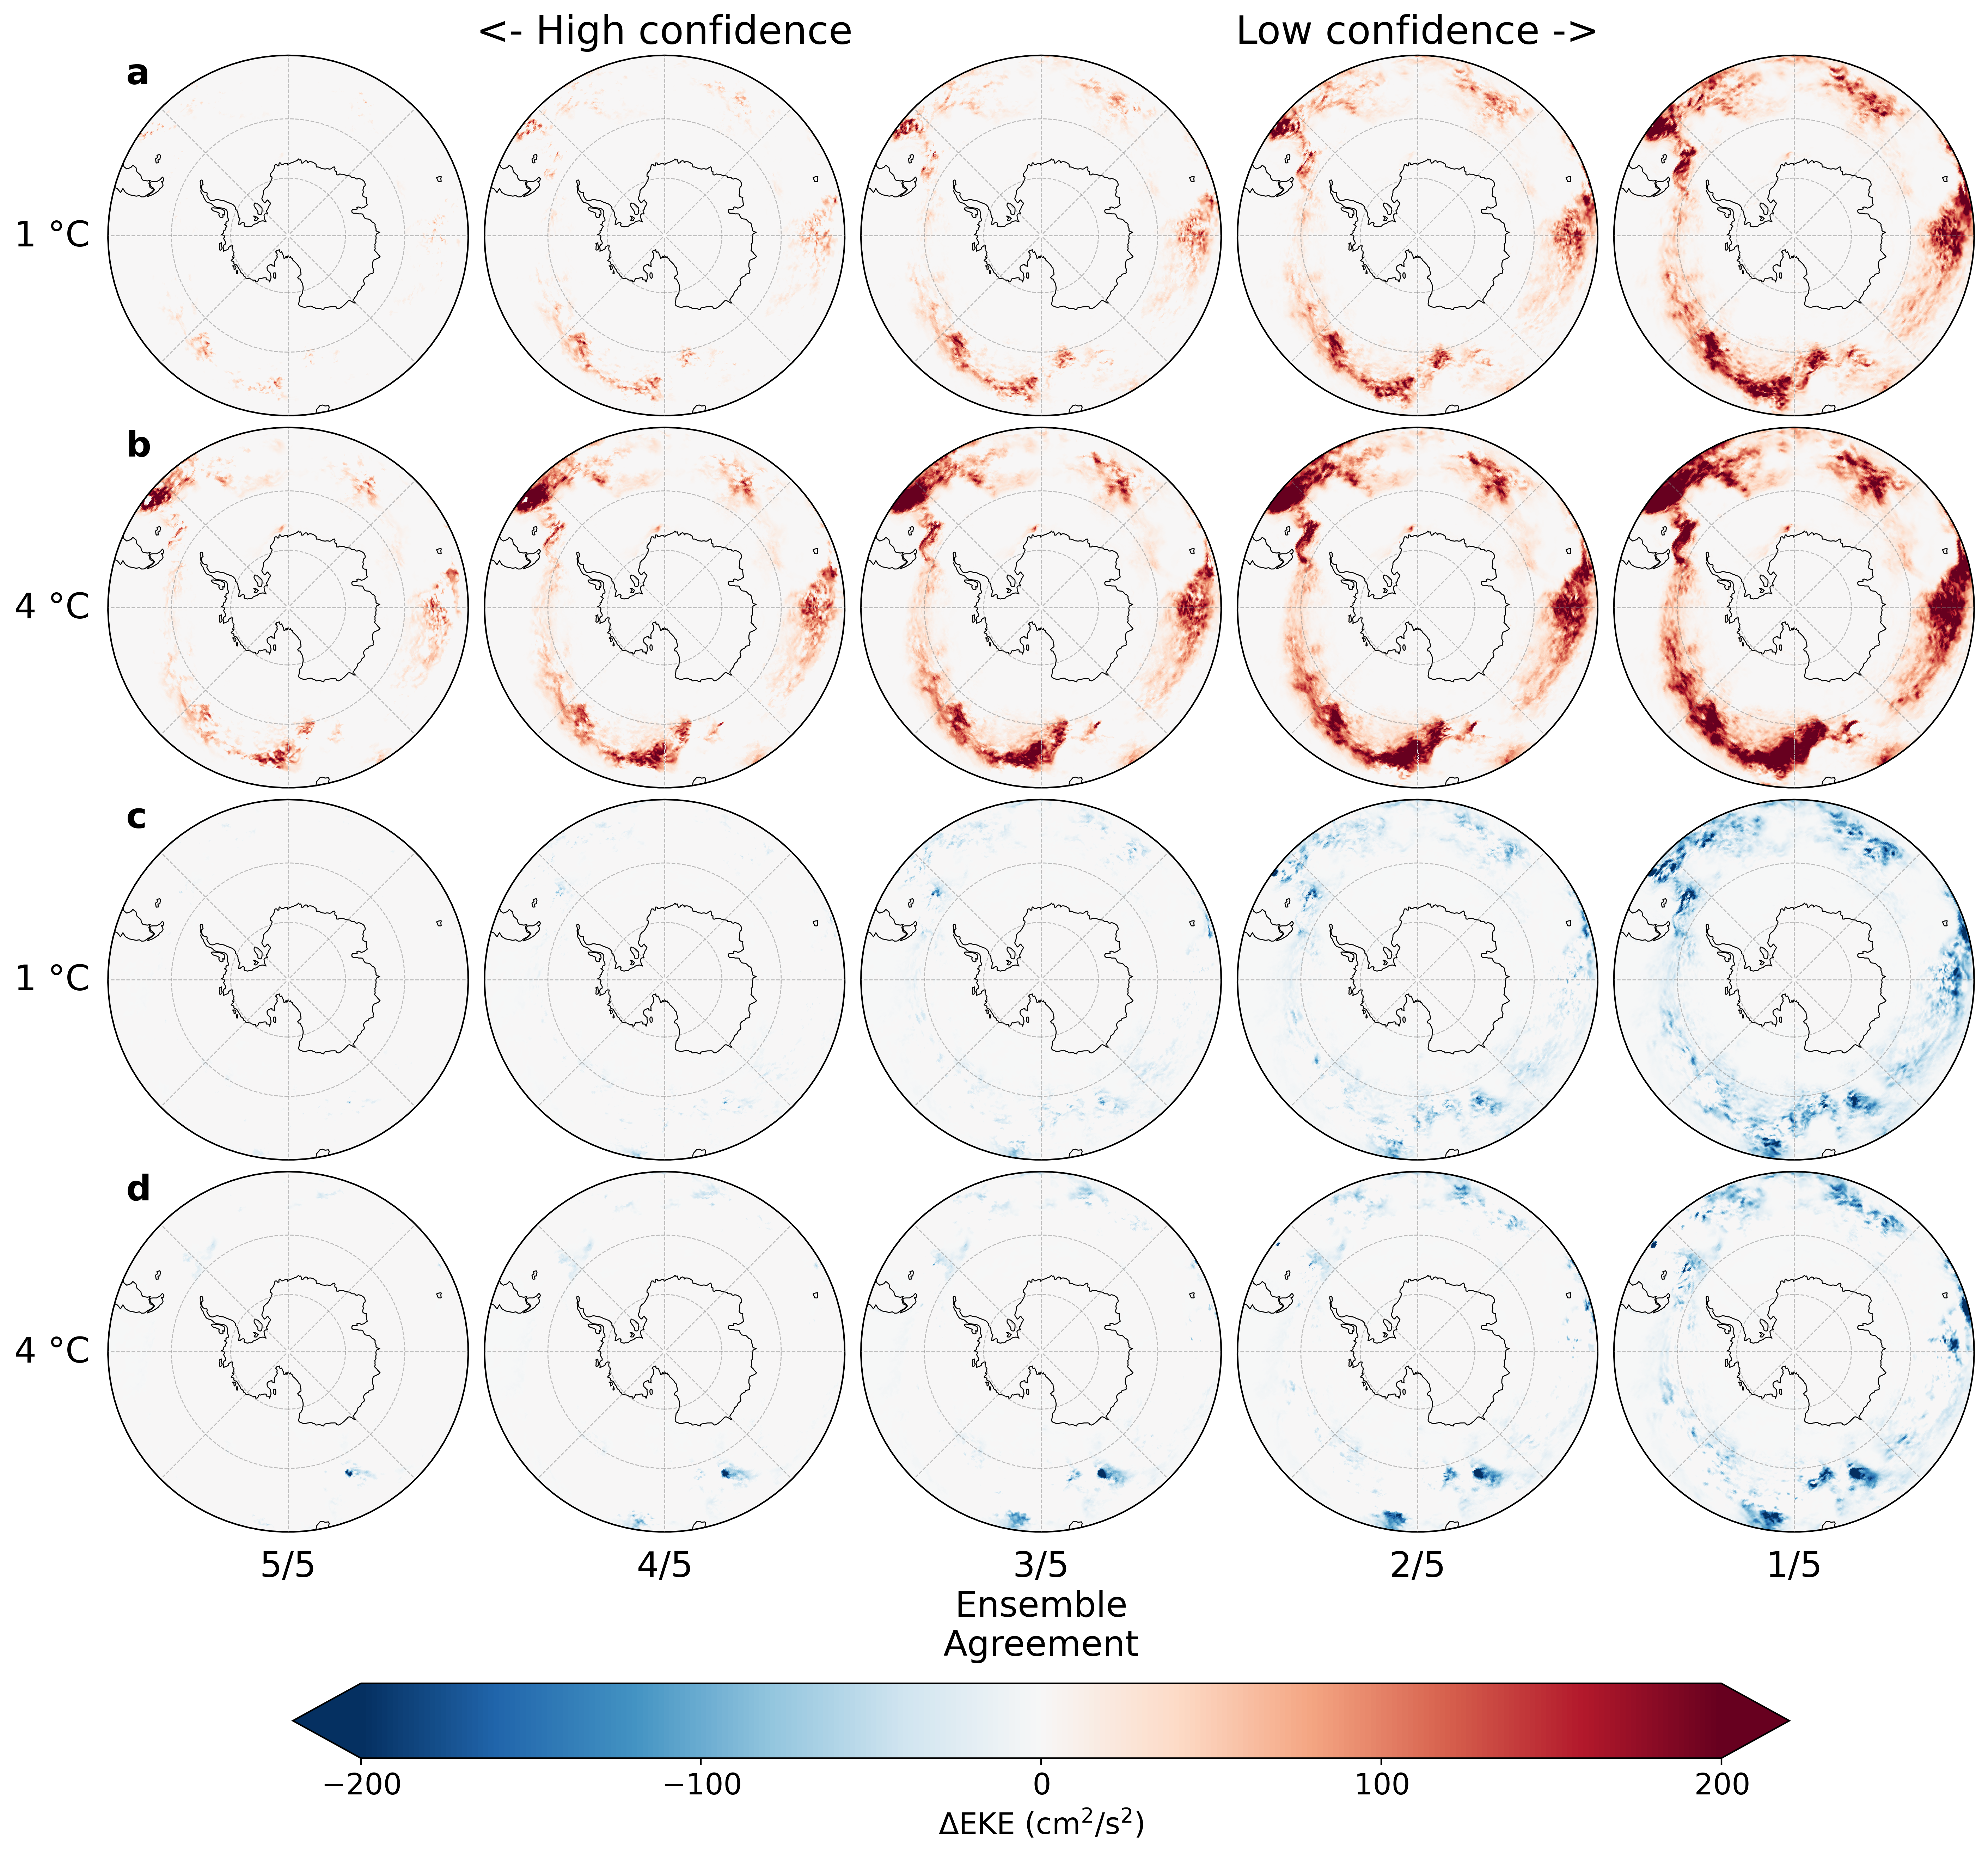

In [8]:
fig,ax=btplot('so3',
       data=[np.where(np.percentile(ds15,0,axis=0)>0,np.percentile(ds15,0,axis=0),[0]),np.where(np.percentile(ds15,25,axis=0)>0,np.percentile(ds15,25,axis=0),[0]),np.where(np.percentile(ds15,50,axis=0)>0,np.percentile(ds15,50,axis=0),[0]),np.where(np.percentile(ds15,75,axis=0)>0,np.percentile(ds15,75,axis=0),[0]),np.where(np.percentile(ds15,100,axis=0)>0,np.percentile(ds15,100,axis=0),[0]),
            np.where(np.percentile(ds90,0,axis=0)>0,np.percentile(ds90,0,axis=0),[0]),np.where(np.percentile(ds90,25,axis=0)>0,np.percentile(ds90,25,axis=0),[0]),np.where(np.percentile(ds90,50,axis=0)>0,np.percentile(ds90,50,axis=0),[0]),np.where(np.percentile(ds90,75,axis=0)>0,np.percentile(ds90,75,axis=0),[0]),np.where(np.percentile(ds90,100,axis=0)>0,np.percentile(ds90,100,axis=0),[0]),
            np.where(np.percentile(ds15,100,axis=0)<0,np.percentile(ds15,100,axis=0),[0]),np.where(np.percentile(ds15,75,axis=0)<0,np.percentile(ds15,75,axis=0),[0]),np.where(np.percentile(ds15,50,axis=0)<0,np.percentile(ds15,50,axis=0),[0]),np.where(np.percentile(ds15,25,axis=0)<0,np.percentile(ds15,25,axis=0),[0]),np.where(np.percentile(ds15,0,axis=0)<0,np.percentile(ds15,0,axis=0),[0]),
            np.where(np.percentile(ds90,100,axis=0)<0,np.percentile(ds90,100,axis=0),[0]),np.where(np.percentile(ds90,75,axis=0)<0,np.percentile(ds90,75,axis=0),[0]),np.where(np.percentile(ds90,50,axis=0)<0,np.percentile(ds90,50,axis=0),[0]),np.where(np.percentile(ds90,25,axis=0)<0,np.percentile(ds90,25,axis=0),[0]),np.where(np.percentile(ds90,0,axis=0)<0,np.percentile(ds90,0,axis=0),[0])],
       figsize=(14,13),
       rowscol=(4,5),
       levels=[-200,200,25],
       mapproj='sp',
       tickdist=100,
       units='ΔEKE ($\mathregular{cm^2}$/$\mathregular{s^2}$)',
       fontsize='15',
       titles=[None,'<- High confidence',None,'Low confidence ->',None,
               None,None,None,None,None,None,None,None,None,None,None,None,None,None,None],
       cmap='RdBu_r',
       box=[-180,180,-90,-45],
       dpi=400,
       ptype='cf',
      ygridlocs=[-75,-60,-45],
      # hatchmask=mZ1,
       xlabs=[None,None,None,None,None,None,None,None,None,None,
              None,None,None,None,None,'5/5','4/5','3/5\nEnsemble\nAgreement','2/5','1/5',
             ]
      )
ax[0].annotate('1 °C', xy=(-0.05, 0.45),xycoords='axes fraction',horizontalalignment='right', 
                     verticalalignment='bottom',fontsize=18)
ax[5].annotate('4 °C', xy=(-0.05, 0.45),xycoords='axes fraction',horizontalalignment='right', 
                     verticalalignment='bottom',fontsize=18)
ax[10].annotate('1 °C', xy=(-0.05, 0.45),xycoords='axes fraction',horizontalalignment='right', 
                     verticalalignment='bottom',fontsize=18)
ax[15].annotate('4 °C', xy=(-0.05, 0.45),xycoords='axes fraction',horizontalalignment='right', 
                     verticalalignment='bottom',fontsize=18)
ax[0].annotate('a', xy=(0.05, 0.90),xycoords='axes fraction',horizontalalignment='left', 
                     verticalalignment='bottom',fontsize=18,weight='bold')
ax[5].annotate('b', xy=(0.05, 0.90),xycoords='axes fraction',horizontalalignment='left', 
                     verticalalignment='bottom',fontsize=18,weight='bold')
ax[10].annotate('c', xy=(0.05, 0.90),xycoords='axes fraction',horizontalalignment='left', 
                     verticalalignment='bottom',fontsize=18,weight='bold')
ax[15].annotate('d', xy=(0.05, 0.90),xycoords='axes fraction',horizontalalignment='left', 
                     verticalalignment='bottom',fontsize=18,weight='bold')

plt.savefig(savepath+'figure_4.png',bbox_inches='tight')